In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## I. Importing essential libraries

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'drive', 'sample_data']


## II. Importing and understanding our dataset 

In [3]:
dataset = pd.read_csv("drive/MyDrive/cardio_train.csv",sep=";")

#### Shape of dataset

In [4]:
dataset.shape

(70000, 13)

#### Printing out a few columns

In [5]:
dataset.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Removing the Outliers

In [6]:
dataset.drop("id",axis=1,inplace=True)
dataset.drop_duplicates(inplace=True)
out_filter = ((dataset["ap_hi"]>250) | (dataset["ap_lo"]>200))
dataset = dataset[~out_filter]
out_filter2 = ((dataset["ap_hi"] < 0) | (dataset["ap_lo"] < 0))
dataset = dataset[~out_filter2]
dataset["age"] = dataset["age"]/365
dataset["age"] = dataset["age"].astype(int)
len(dataset)

68975

In [7]:
dataset.sample(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
49550,45,1,165,65.0,120,80,1,1,0,0,1,0
13913,48,2,172,72.0,160,80,1,1,0,0,0,1
47132,60,2,179,78.0,160,90,3,1,1,0,1,1
63365,54,1,165,55.0,120,60,1,1,0,0,0,0
35710,58,1,160,72.0,110,80,1,1,0,0,1,0


#### Description

In [8]:
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000
mean,52.826923,1.348793,164.359681,74.121414,126.324842,81.334585,1.364509,1.225937,0.087901,0.053614,0.803277,0.494947
std,6.769931,0.476592,8.205382,14.329915,17.710918,9.874490,0.678783,0.571896,0.283154,0.225255,0.397524,0.499978
min,29.000000,1.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68975 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68975 non-null  int64  
 1   gender       68975 non-null  int64  
 2   height       68975 non-null  int64  
 3   weight       68975 non-null  float64
 4   ap_hi        68975 non-null  int64  
 5   ap_lo        68975 non-null  int64  
 6   cholesterol  68975 non-null  int64  
 7   gluc         68975 non-null  int64  
 8   smoke        68975 non-null  int64  
 9   alco         68975 non-null  int64  
 10  active       68975 non-null  int64  
 11  cardio       68975 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


#### Analysing the 'cardio' variable

In [10]:
dataset["cardio"].describe()

count    68975.000000
mean         0.494947
std          0.499978
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: cardio, dtype: float64

In [11]:
dataset["cardio"].unique()

array([0, 1])

#### Clearly, this is a classification problem, with the output variable having values '0' and '1'

### Checking correlation between columns and printing Covariance Matrix

cardio         1.000000
ap_hi          0.401392
ap_lo          0.328875
age            0.239594
cholesterol    0.221377
weight         0.179922
gluc           0.089734
active         0.037280
smoke          0.016372
height         0.010447
alco           0.008151
gender         0.007457
Name: cardio, dtype: float64


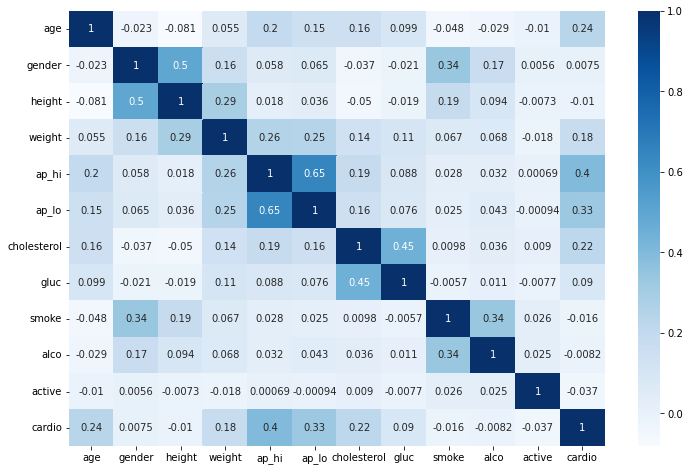

In [12]:
print(dataset.corr()["cardio"].abs().sort_values(ascending=False))
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap="Blues",annot=True)
plt.show()


## Exploratory Data Analysis (EDA)

### First, analysing the 'cardio' variable:

0    34836
1    34139
Name: cardio, dtype: int64


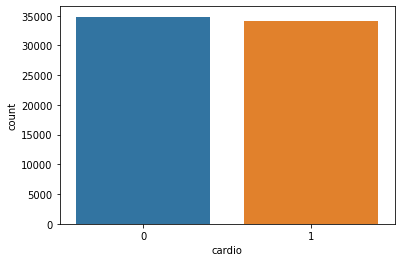

In [13]:
y = dataset["cardio"]
sns.countplot(y)
target_temp = dataset.cardio.value_counts()
print(target_temp)

In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/len(dataset),2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/len(dataset),2)))

Percentage of patience without heart problems: 50.51
Percentage of patience with heart problems: 49.49


Hence this observation confirms that our dataset is balanced in-terms output variable


### Analysing the 'gender' feature

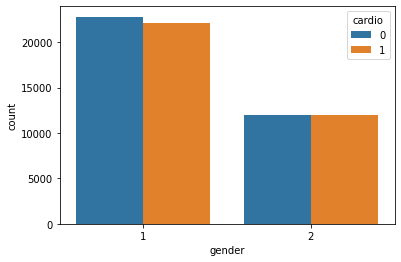

In [15]:
sns.countplot(x ='gender', hue = "cardio", data = dataset)
plt.show()

Here the 0 (blue bar) is the low risk/negative cases and 1 (red bar) is the high risk/positive cases. There is not much of a difference between the positive and negative cases for either genders.                     So, this attribute will not help much in the prediction.

### Analysing the 'age' feature

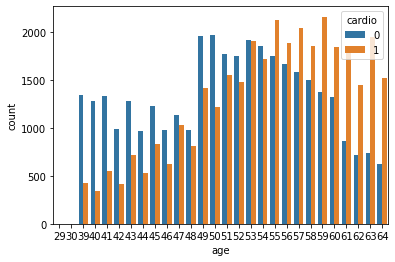

In [16]:
sns.countplot(x ='age', hue = "cardio", data = dataset)
plt.show()

Here we can see that the positive cases rise significantly with the increase in age.


### Analysing the 'cholesterol' feature


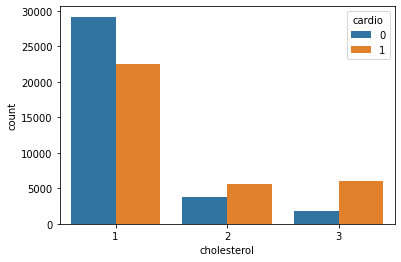

In [17]:
sns.countplot(x ='cholesterol', hue = "cardio", data = dataset)
plt.show()

Here cholesterol levels are (1: normal, 2: above normal, 3: well above normal). For level 1, there are more negative cases than the positive,
which indicate that this level does not add to the risk of the disease. However, as the levels increase, we see a rise in positive cases.         
Hence, we conclude that as cholesterol levels increase, so does the chances of getting the disease.

### Analysing the 'glucose' feature

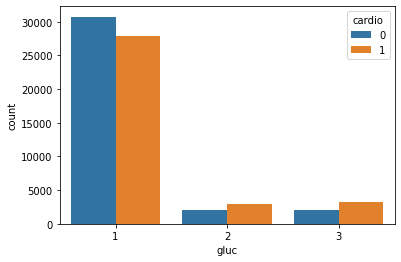

In [18]:
sns.countplot(x ='gluc', hue = "cardio", data = dataset)
plt.show()

Here the glucose levels are (1: normal, 2: above normal, 3: well above normal).\
The above figure suggests that there is a rise in positive cases with the increase in glucose level.

### Analysing the 'smoking' feature

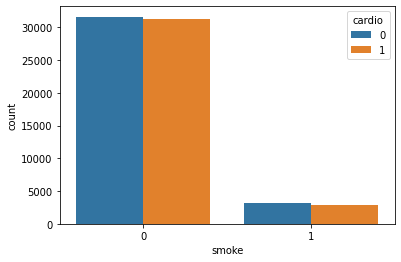

In [19]:
sns.countplot(x ='smoke', hue = "cardio", data = dataset)
plt.show()

The 0 value are the people who doesn't smoke and value 1 are the people who smoke. Here we can see from the above graph that there is not much difference in the number of positive and negative cases with regards to smoking. Hence, this attribute will not help much in the prediction.

### Analysing the 'alco' feature

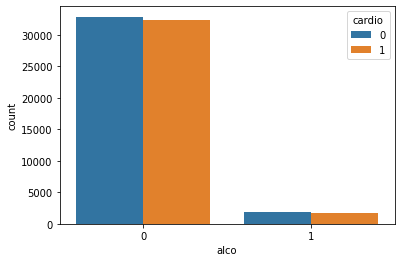

In [20]:
sns.countplot(x ='alco', hue = "cardio", data = dataset)
plt.show()

The 0 value are the people who doesn't consume alcohol and value 1 are the people who consume alcohol. Here the above graph suggests that the consumption of alcohol doesn’t impact the prediction of disease.

### Analysing the 'active' feature

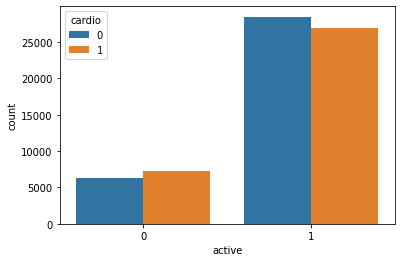

In [21]:
sns.countplot(x ='active', hue = "cardio", data = dataset)
plt.show()

Here the 0 value is for those who are physically inactive and 1 for those who are physically active. There is some difference in the number of positive and negative cases, with higher positive cases for those who are inactive. 

## IV. Train Test split

In [22]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("cardio",axis=1)
target = dataset["cardio"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [23]:
print('Dimensions of Training Data:')
print(X_train.shape)
print('Dimensions of Testing Data:')
X_test.shape

Dimensions of Training Data:
(55180, 11)
Dimensions of Testing Data:


(13795, 11)

## V. Model Fitting

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The Accuracy Score achieved using Logistic Regression is: "+str(score_lr)+" %")
precision = precision_score(Y_test, Y_pred_lr)
recall = recall_score(Y_test, Y_pred_lr)
print("The Precision achieved using Logistic Regression is: ",round(precision*100,2))
print("The Recall achieved using Logistic Regression is: ",round(recall*100,2))
f1score = f1_score(Y_test, Y_pred_lr)
print("The F1-Score achieved using Logistic Regression is: ",round(f1score*100,2))

The Accuracy Score achieved using Logistic Regression is: 71.68 %
The Precision achieved using Logistic Regression is:  74.04
The Recall achieved using Logistic Regression is:  67.03
The F1-Score achieved using Logistic Regression is:  70.36


Printing Confusion Matrix

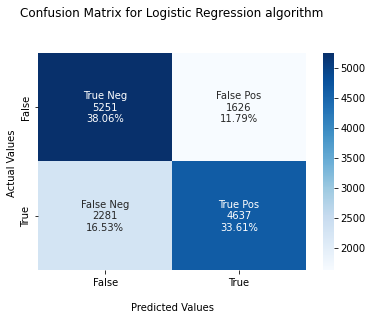

In [25]:
cf_matrix = confusion_matrix(Y_test, Y_pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for Logistic Regression algorithm\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

### K Nearest Neighbors

Text(0, 0.5, 'misclassification rate')

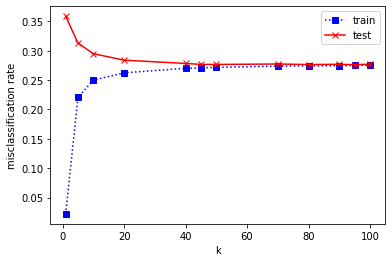

In [26]:
from sklearn.neighbors import KNeighborsClassifier
ks = [1,5,10,20,40,45,50,70,80,90,95,100]
train_errs = []
test_errs = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  train_errs.append(1 - knn.score(X_train, Y_train))
  test_errs.append(1 - knn.score(X_test, Y_test))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')

Here we can see that n = 80 serves as best number of neighbours for the KNN algorithm

In [27]:
knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
precision = precision_score(Y_test, Y_pred_knn)
recall = recall_score(Y_test, Y_pred_knn)
print("The Precision achieved using KNN is: ",round(precision*100,2))
print("The Recall achieved using KNN is: ",round(recall*100,2))
f1score = f1_score(Y_test, Y_pred_knn)
print("The F1-Score achieved using KNN is: ",round(f1score*100,2))

The accuracy score achieved using KNN is: 72.36 %
The Precision achieved using KNN is:  75.76
The Recall achieved using KNN is:  66.0
The F1-Score achieved using KNN is:  70.54


Printing Confusion Matrix

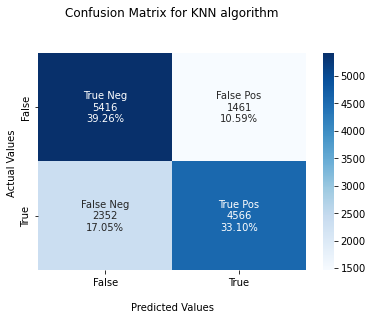

In [28]:
cf_matrix = confusion_matrix(Y_test, Y_pred_knn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for KNN algorithm\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

###Feature Extraction and Selection

We know that: \
bmi = (weight/(height ∗ height)) ∗ 10000 \
Hence we can remove the height and weight columns and add the new featue name BMI.

In [29]:
dataset["bmi"] = dataset["weight"] / (dataset["height"]/100)**2
dataset["bmi"] = dataset["bmi"].round(2)
dataset.drop("height",axis=1,inplace=True)
dataset.drop("weight",axis=1,inplace=True)
df = pd.DataFrame(dataset)
df.to_csv('modified_cardio_train.csv',index = False, header=True)
dataset.drop("alco",axis=1,inplace=True)
dataset.drop("smoke",axis=1,inplace=True)
dataset.drop("gender",axis=1,inplace=True)
dataset.sample(5)

,age,ap_hi,ap_lo,cholesterol,gluc,active,cardio,bmi
27575,59,120,100,1,1,0,1,31.89
12306,60,140,90,1,1,0,1,37.11
24368,60,110,90,1,1,0,0,26.53
52914,56,150,100,2,1,1,1,24.91
36896,57,150,100,1,1,1,1,26.56


In [30]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("cardio",axis=1)
target = dataset["cardio"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

## Model Fitting after Feature Selection and Extraction

###Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
precision = precision_score(Y_test, Y_pred_lr)
recall = recall_score(Y_test, Y_pred_lr)
print("The Precision achieved using Logistic Regression is: ",round(precision*100,2))
print("The Recall achieved using Logistic Regression is: ",round(recall*100,2))
f1score = f1_score(Y_test, Y_pred_lr)
print("The F1-Score achieved using Logistic Regression is: ",round(f1score*100,2))

The accuracy score achieved using Logistic Regression is: 72.85 %
The Precision achieved using Logistic Regression is:  75.86
The Recall achieved using Logistic Regression is:  67.27
The F1-Score achieved using Logistic Regression is:  71.31


Printing the Confusion Matrix

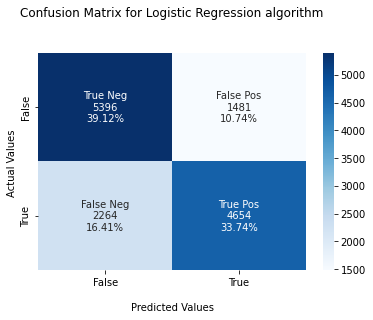

In [32]:
cf_matrix = confusion_matrix(Y_test, Y_pred_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for Logistic Regression algorithm\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

###K Nearest Neighbors

Text(0, 0.5, 'misclassification rate')

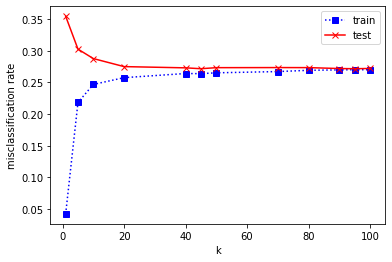

In [33]:
from sklearn.neighbors import KNeighborsClassifier
ks = [1,5,10,20,40,45,50,70,80,90,95,100]
train_errs = []
test_errs = []
for k in ks:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, Y_train)
  train_errs.append(1 - knn.score(X_train, Y_train))
  test_errs.append(1 - knn.score(X_test, Y_test))
plt.figure()
plt.plot(ks, train_errs, 'bs:', label='train')
plt.plot(ks, test_errs, 'rx-', label='test')
plt.legend()
plt.xlabel('k')
plt.ylabel('misclassification rate')

Here we can see that n = 80 serves as best number of neighbours for the KNN algorithm

In [34]:
knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")
precision = precision_score(Y_test, Y_pred_knn)
recall = recall_score(Y_test, Y_pred_knn)
print("The Precision achieved using KNN is: ",round(precision*100,2))
print("The Recall achieved using KNN is: ",round(recall*100,2))
f1score = f1_score(Y_test, Y_pred_knn)
print("The F1-Score achieved using KNN is: ",round(f1score*100,2))

The accuracy score achieved using KNN is: 72.65 %
The Precision achieved using KNN is:  75.99
The Recall achieved using KNN is:  66.46
The F1-Score achieved using KNN is:  70.91


Printing the Confusion Matrix

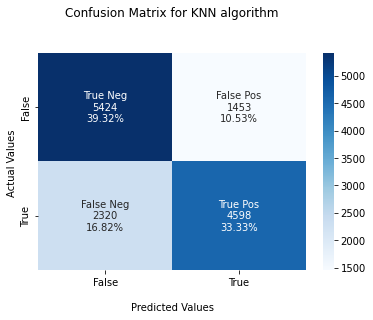

In [35]:
cf_matrix = confusion_matrix(Y_test, Y_pred_knn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for KNN algorithm\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

##Ensemble Classification with Bagging

In [36]:
from sklearn.preprocessing import StandardScaler
numeric=['age','bmi','ap_hi','ap_lo', 'cholesterol', 'gluc', 'active']
sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.fit_transform(X_test[numeric])

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
knn = KNeighborsClassifier(n_neighbors=80)
bag_knn = BaggingClassifier(knn, n_estimators=25, max_samples=0.5, random_state=None)
bag_knn.fit(X_train,Y_train)
Y_pred_bag_knn = bag_knn.predict(X_test)
score_bag_knn = round(accuracy_score(Y_pred_bag_knn,Y_test)*100,2)
print("The accuracy score achieved using Bagging with KNN Algorithm is: "+str(score_bag_knn)+" %")
precision = precision_score(Y_test, Y_pred_bag_knn)
recall = recall_score(Y_test, Y_pred_bag_knn)
print("The Precision achieved using Bagging with KNN Algorithm is: ",round(precision*100,2))
print("The Recall achieved using Bagging with KNN Algorithm is: ",round(recall*100,2))
f1score = f1_score(Y_test, Y_pred_bag_knn)
print("The F1-Score achieved using Bagging with KNN Algorithm is: ",round(f1score*100,2))

The accuracy score achieved using Bagging with KNN Algorithm is: 73.5 %
The Precision achieved using Bagging with KNN Algorithm is:  76.21
The Recall achieved using Bagging with KNN Algorithm is:  68.56
The F1-Score achieved using Bagging with KNN Algorithm is:  72.18


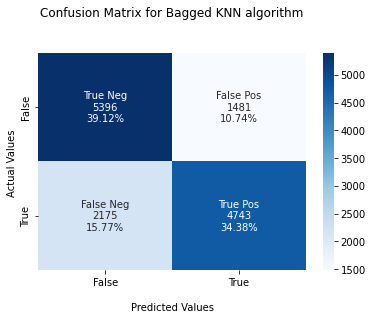

In [38]:
cf_matrix = confusion_matrix(Y_test, Y_pred_bag_knn)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for Bagged KNN algorithm\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [39]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
numeric=['age','bmi','ap_hi','ap_lo', 'cholesterol', 'gluc', 'active']
sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.fit_transform(X_test[numeric])
lr = LogisticRegression()
# bag_lr = BaggingClassifier(lr, random_state=None, max_samples=30000)
bag_lr = BaggingClassifier(lr, n_estimators=25, max_samples=0.5, random_state=None)
bag_lr.fit(X_train,Y_train)
Y_pred_bag_lr = bag_lr.predict(X_test)
score_bag_lr = round(accuracy_score(Y_pred_bag_lr,Y_test)*100,2)
print("The accuracy score achieved using Bagging with Logistic Regression is: "+str(score_bag_lr)+" %")
precision = precision_score(Y_test, Y_pred_bag_lr)
recall = recall_score(Y_test, Y_pred_bag_lr)
print("The Precision achieved using Bagging with Logistic Regression is: ",round(precision*100,2))
print("The Recall achieved using Bagging with Logistic Regression is: ",round(recall*100,2))
f1score = f1_score(Y_test, Y_pred_bag_lr)
print("The F1-Score achieved using Bagging with Logistic Regression is: ",round(f1score*100,2))

The accuracy score achieved using Bagging with Logistic Regression is: 72.88 %
The Precision achieved using Bagging with Logistic Regression is:  76.19
The Recall achieved using Bagging with Logistic Regression is:  66.8
The F1-Score achieved using Bagging with Logistic Regression is:  71.19


Printing the Covariace Matrix

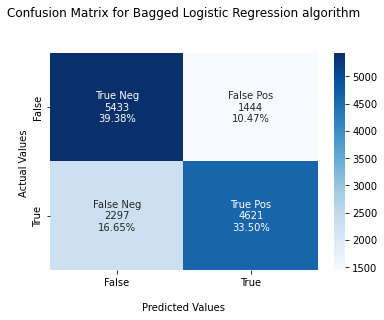

In [40]:
cf_matrix = confusion_matrix(Y_test, Y_pred_bag_lr)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix for Bagged Logistic Regression algorithm\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()